In [1]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = [16, 8]
matplotlib.rcParams.update({'font.size': 22})
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")


Populating the interactive namespace from numpy and matplotlib


In [2]:
# read in the data 
Fdf = pd.read_csv("familyData.csv")
Fdf = Fdf.iloc[:,1:] 
print(Fdf.columns)

Index(['year', 'composition', 'headCount', 'ageHead', 'liquidWealth',
       'laborIncome', 'costPerPerson', 'totalExpense', 'participation',
       'investmentAmount', 'annuityIRA', 'wealthWithoutHomeEquity',
       'wealthWithHomeEquity', 'HomeEquity', 'maritalStatus',
       'employmentStatus', 'education', 'race', 'industry', 'ownership',
       'skillLevel', 'financeExperience', 'ageGroup', 'decadeGroup',
       'stockInvestmentRatio'],
      dtype='object')


### Summary Plots 

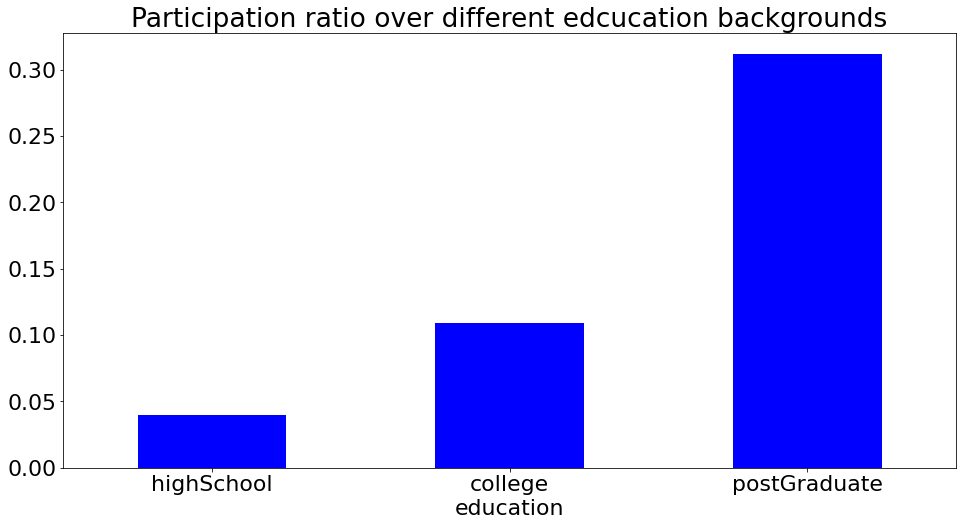

In [3]:
plt.title("Participation ratio over different edcucation backgrounds")
Fdf.loc[Fdf["education"]=="middleSchool", "education"] = "highSchool"
Fdf.groupby("education").participation.mean().reindex(["highSchool", "college", "postGraduate"]).plot.bar(color = "blue",rot=0)
savefig('plots/educationParticipation.jpg')

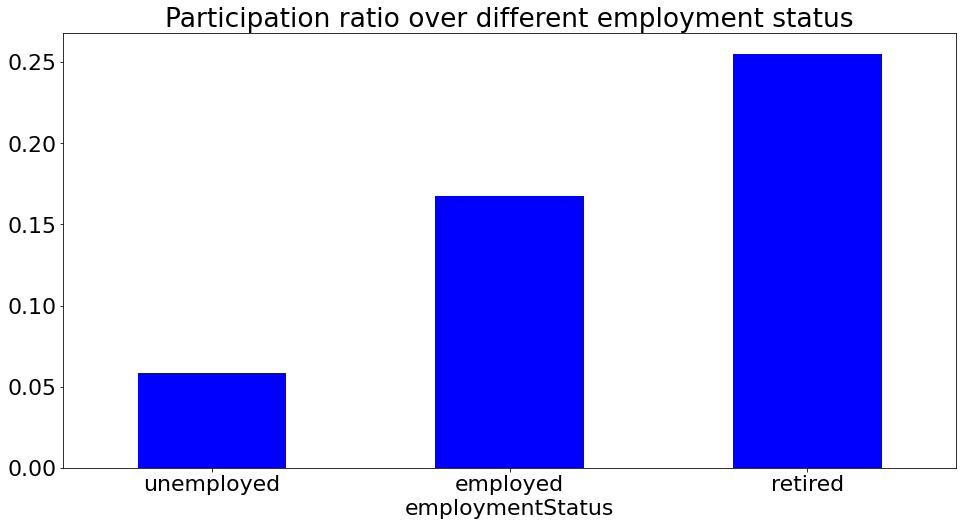

In [4]:
Fdf.loc[Fdf["employmentStatus"]=="Working", "employmentStatus"] = "employed"
plt.title("Participation ratio over different employment status")
Fdf.groupby("employmentStatus").participation.mean().reindex(["unemployed", "employed", "retired"]).plot.bar(color = "blue",rot=0)
savefig('plots/employmentParticipation.jpg')

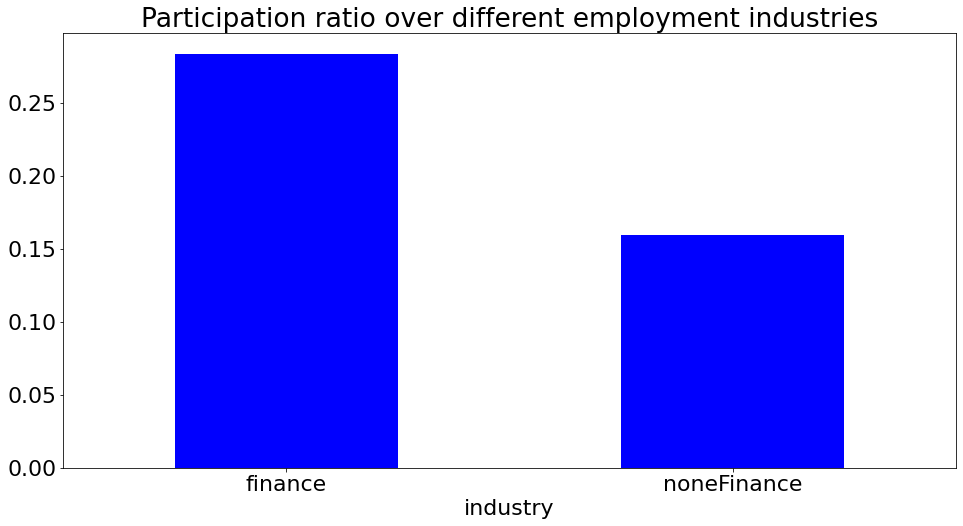

In [5]:
plt.title("Participation ratio over different employment industries")
Fdf.groupby("industry").participation.mean().plot.bar(color = "blue",rot=0)
savefig('plots/industryParticipation.jpg')

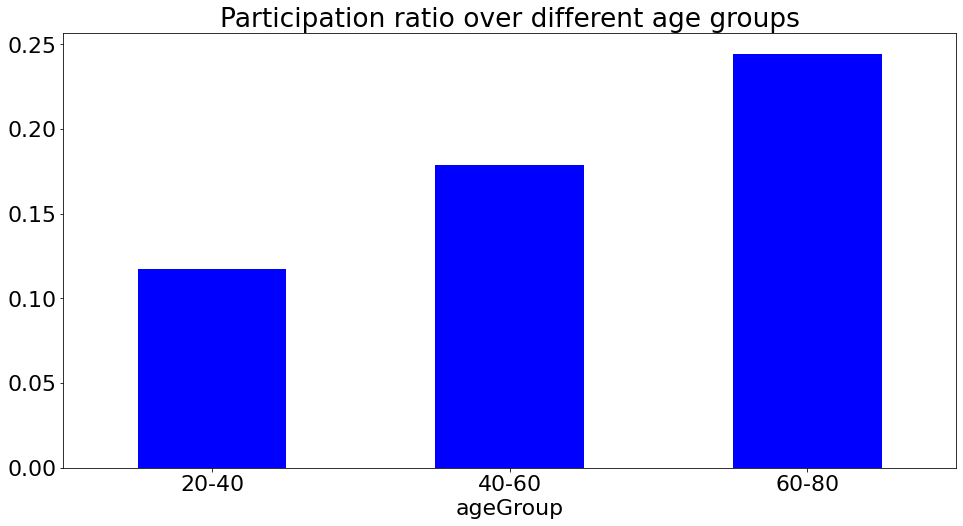

In [6]:
plt.title("Participation ratio over different age groups")
Fdf.groupby("ageGroup").participation.mean().plot.bar(color = "blue",rot=0)
savefig('plots/ageParticipation.jpg')

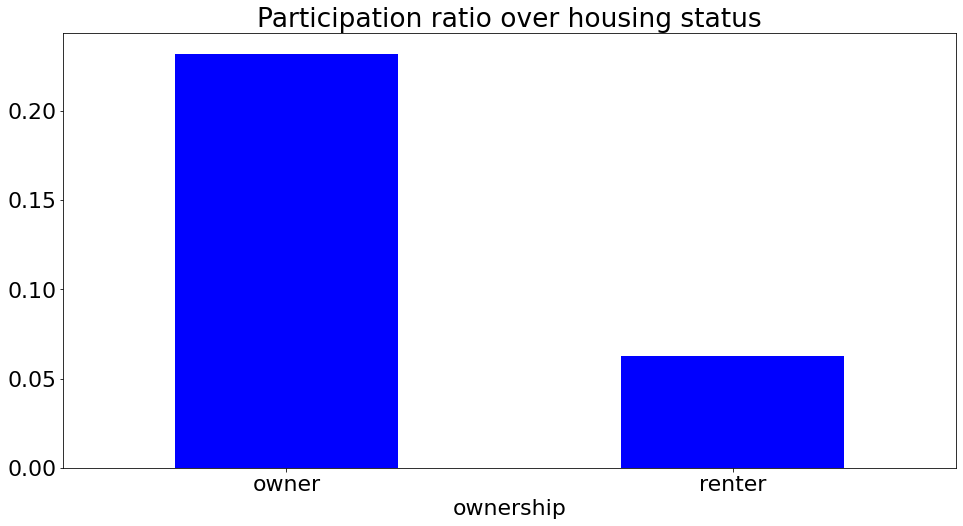

In [7]:
plt.title("Participation ratio over housing status")
Fdf.groupby("ownership").participation.mean().plot.bar(color = "blue",rot=0)
savefig('plots/ownership.jpg')

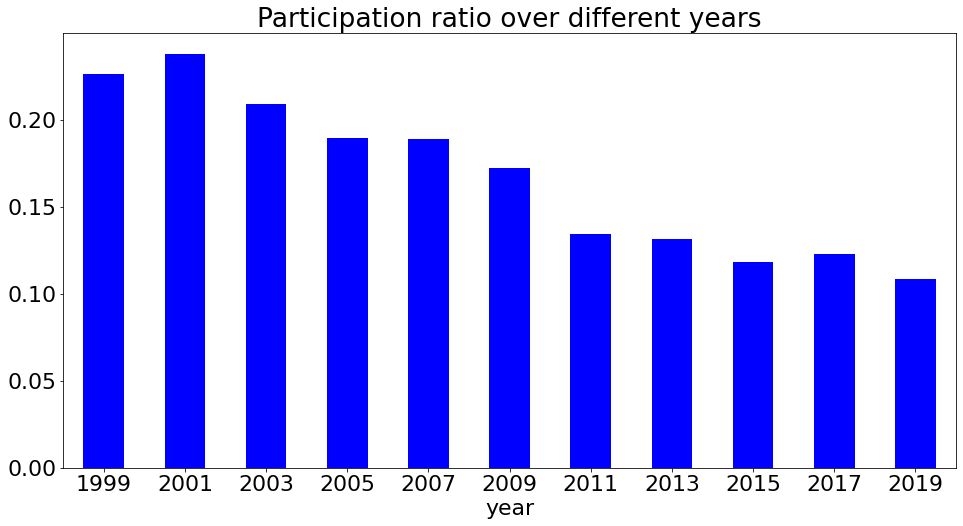

In [8]:
plt.title("Participation ratio over different years")
Fdf.groupby("year").participation.mean().plot.bar(color = "blue",rot=0)
savefig('plots/year.jpg')

### Average Income for rich and poor agents 

<AxesSubplot:xlabel='ageHead'>

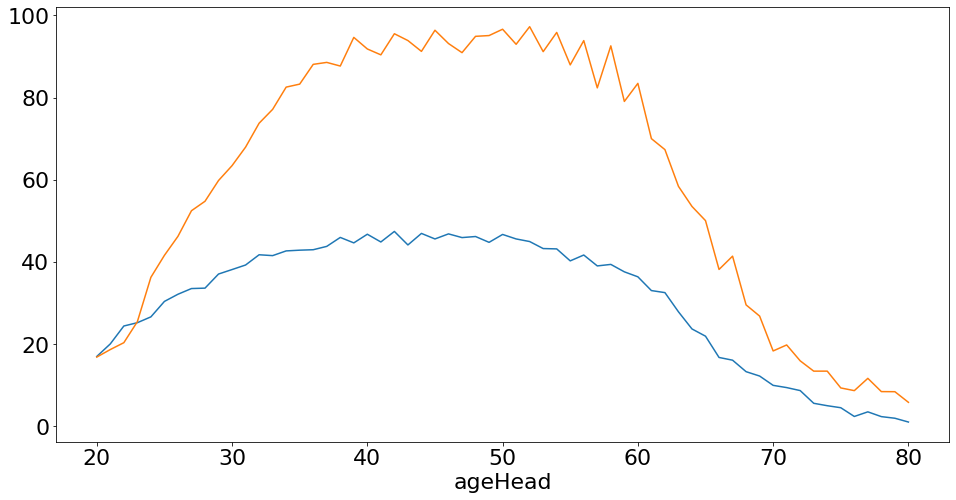

In [21]:
Fdf[(Fdf.education == 'highSchool')|(Fdf.education == 'college')].groupby("ageHead")['laborIncome'].mean().plot(label = "highSchool")
Fdf[Fdf.education == 'postGraduate'].groupby("ageHead")['laborIncome'].mean().plot(label = "postGraduate")

In [75]:
from scipy.signal import savgol_filter
lowIncome = Fdf[(Fdf.education == 'highSchool')|(Fdf.education == 'college')].groupby("ageHead")['laborIncome'].mean().values
highIncome = Fdf[Fdf.education == 'postGraduate'].groupby("ageHead")['laborIncome'].mean().values

lowIncome_median = Fdf[(Fdf.education == 'highSchool')|(Fdf.education == 'college')].groupby("ageHead")['laborIncome'].median().values
highIncome_median = Fdf[Fdf.education == 'postGraduate'].groupby("ageHead")['laborIncome'].median().values

highIncomeSmooth = savgol_filter(highIncome,window_length=9,polyorder=1)
lowIncomeSmooth = savgol_filter(lowIncome,window_length=9,polyorder=1)
ages = list(range(20,81))

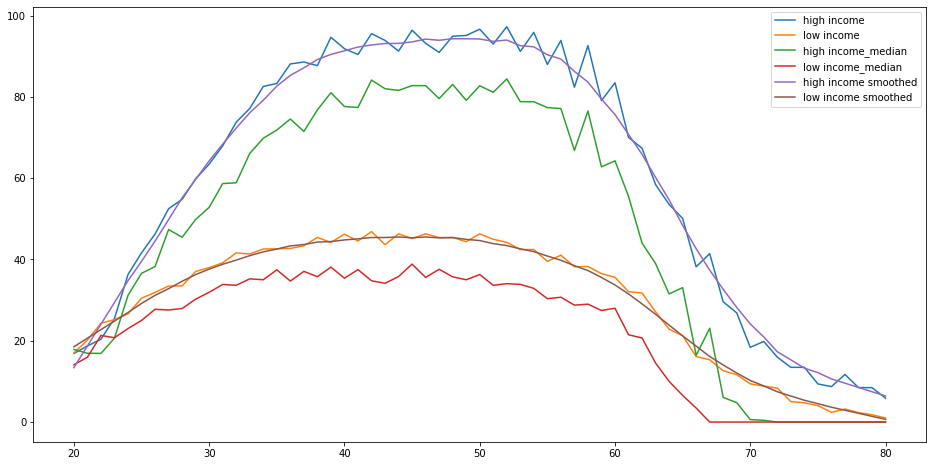

In [76]:
plt.plot(ages, highIncome, label = "high income")
plt.plot(ages, lowIncome, label = "low income")
plt.plot(ages, highIncome_median, label = "high income_median")
plt.plot(ages, lowIncome_median, label = "low income_median")
plt.plot(ages, highIncomeSmooth, label = "high income smoothed")
plt.plot(ages, lowIncomeSmooth, label = "low income smoothed")
plt.legend()

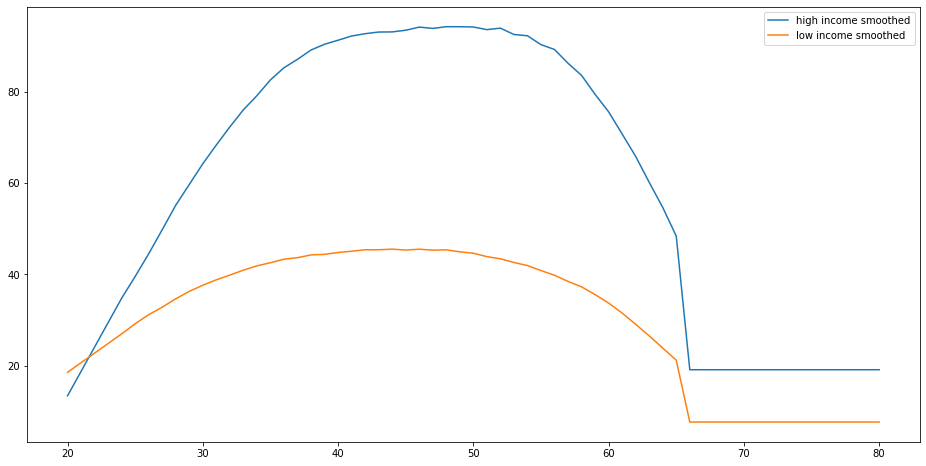

In [77]:
highIncomeSmooth[46:] = np.mean(highIncomeSmooth[46:])
lowIncomeSmooth[46:] = np.mean(lowIncomeSmooth[46:])
plt.plot(ages, highIncomeSmooth, label = "high income smoothed")
plt.plot(ages, lowIncomeSmooth, label = "low income smoothed")
plt.legend()

In [78]:
highIncomeSmooth

array([13.37849579, 18.72595173, 24.07340767, 29.42086361, 34.76831955,
       39.54163551, 44.51306305, 49.79998486, 55.164864  , 59.70479586,
       64.25238847, 68.36753109, 72.32427712, 76.07879845, 79.17340348,
       82.64031977, 85.29410514, 87.14237353, 89.18661906, 90.44546828,
       91.33075851, 92.25294797, 92.76311693, 93.12507862, 93.15385616,
       93.51619373, 94.20868926, 93.92360988, 94.29848755, 94.2909543 ,
       94.23216993, 93.65469847, 93.98051629, 92.58719735, 92.30867529,
       90.3566648 , 89.30021911, 86.27355646, 83.62504444, 79.46396248,
       75.63723767, 70.77055698, 65.86174001, 60.17673265, 54.67652659,
       48.38547057, 19.09723848, 19.09723848, 19.09723848, 19.09723848,
       19.09723848, 19.09723848, 19.09723848, 19.09723848, 19.09723848,
       19.09723848, 19.09723848, 19.09723848, 19.09723848, 19.09723848,
       19.09723848])

In [79]:
lowIncomeSmooth

array([18.52450172, 20.63137728, 22.73825285, 24.84512842, 26.95200399,
       29.18132081, 31.16179354, 32.8150436 , 34.63922158, 36.27658238,
       37.62113776, 38.81209043, 39.84020501, 40.93563765, 41.86623916,
       42.55475938, 43.33589551, 43.66047472, 44.27228605, 44.39225695,
       44.80173256, 45.07201521, 45.39861648, 45.39457498, 45.53156148,
       45.32595159, 45.52129646, 45.31114864, 45.373943  , 44.94413169,
       44.64304047, 43.89029198, 43.40944453, 42.60894212, 41.93145044,
       40.84403453, 39.80539228, 38.45687591, 37.26967232, 35.56824611,
       33.71579233, 31.51489444, 29.05899955, 26.50777094, 23.85424754,
       21.19027804,  7.63103118,  7.63103118,  7.63103118,  7.63103118,
        7.63103118,  7.63103118,  7.63103118,  7.63103118,  7.63103118,
        7.63103118,  7.63103118,  7.63103118,  7.63103118,  7.63103118,
        7.63103118])

In [80]:
np.save("../shutDownRetirement/constant/highIncomeDetermined", highIncomeSmooth)
np.save("../shutDownRetirement/constant/lowIncomeDetermined", lowIncomeSmooth)

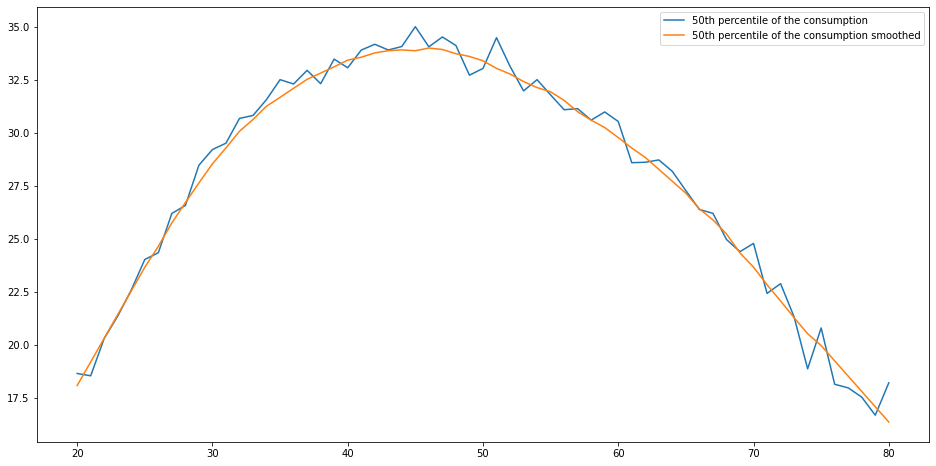

In [81]:
c_bar = Fdf.groupby("ageHead")['totalExpense'].quantile(0.50).values
c_bar_smooth = savgol_filter(c_bar,window_length=11,polyorder=1)
plt.plot(ages, c_bar, label = "50th percentile of the consumption")
plt.plot(ages, c_bar_smooth, label = "50th percentile of the consumption smoothed")
plt.legend()
np.save("../constant/c_bar", c_bar_smooth)

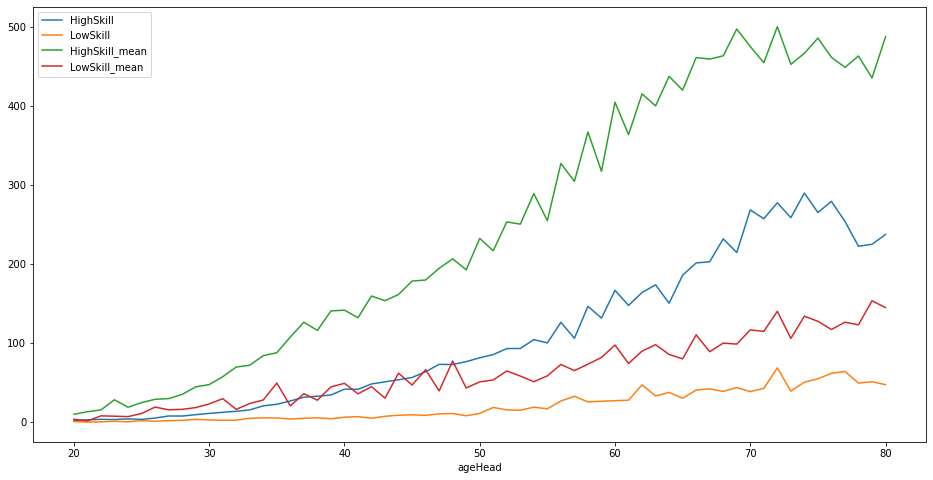

In [82]:
Fdf[Fdf.skillLevel == 'High'].groupby("ageHead")['wealthWithHomeEquity'].median().plot(label = "HighSkill")
Fdf[Fdf.skillLevel == 'Low'].groupby("ageHead")['wealthWithHomeEquity'].median().plot(label = "LowSkill")
Fdf[Fdf.skillLevel == 'High'].groupby("ageHead")['wealthWithHomeEquity'].mean().plot(label = "HighSkill_mean")
Fdf[Fdf.skillLevel == 'Low'].groupby("ageHead")['wealthWithHomeEquity'].mean().plot(label = "LowSkill_mean")
plt.legend()

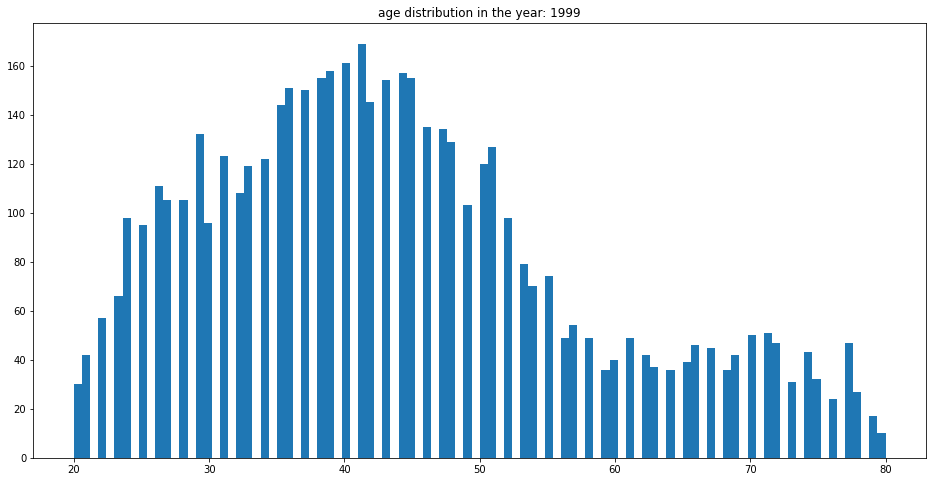

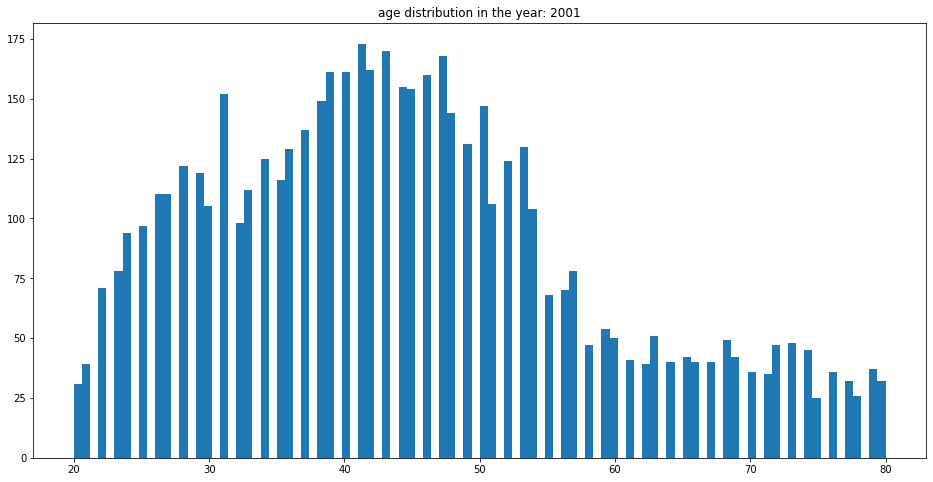

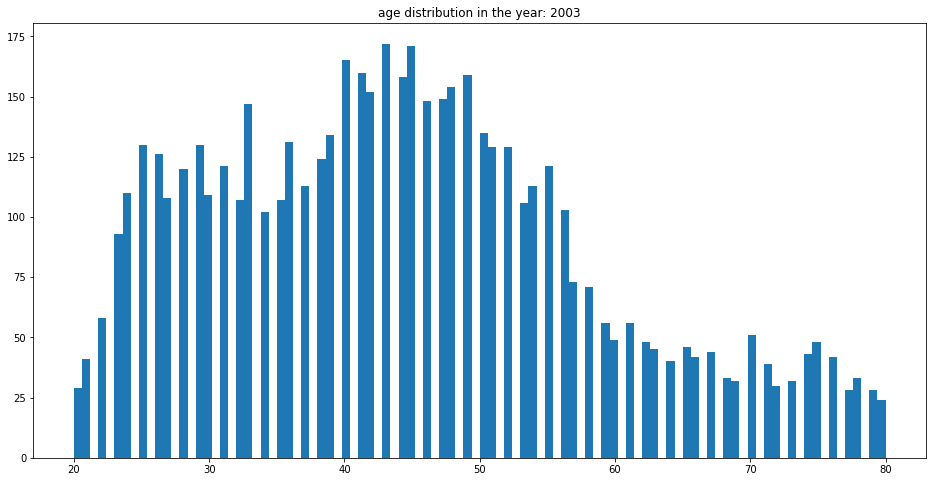

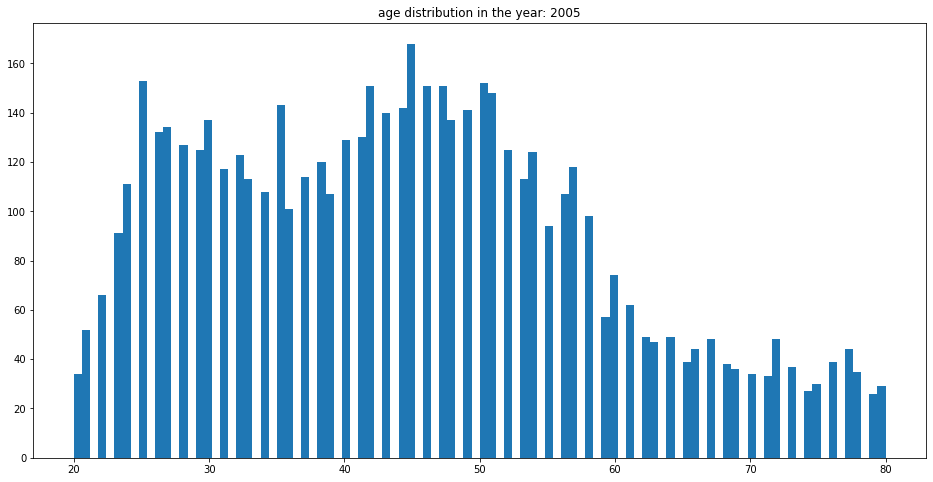

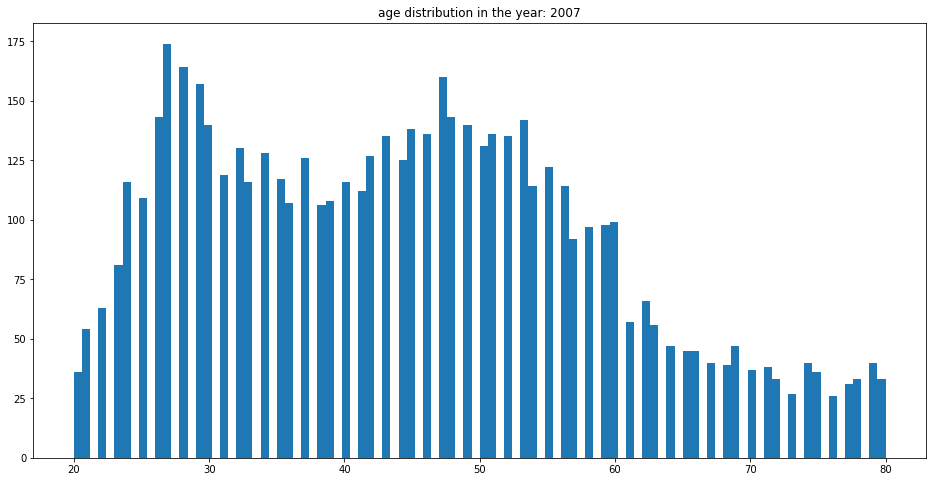

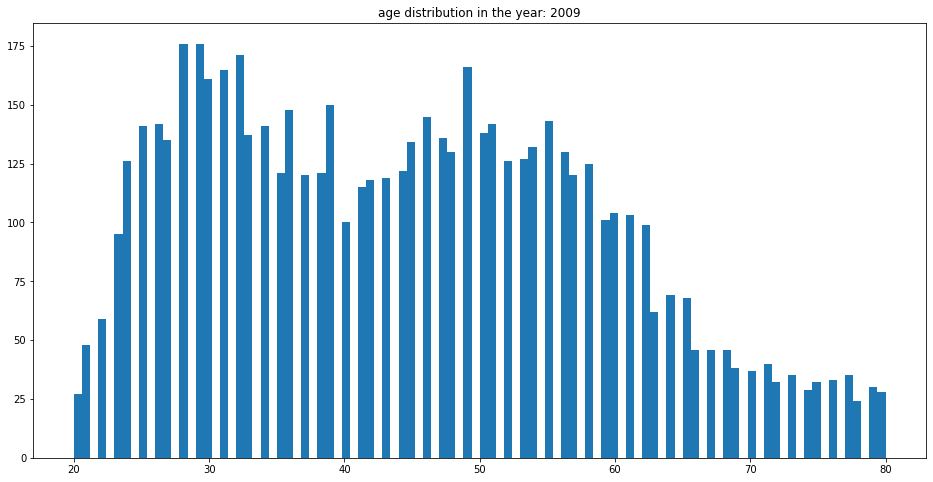

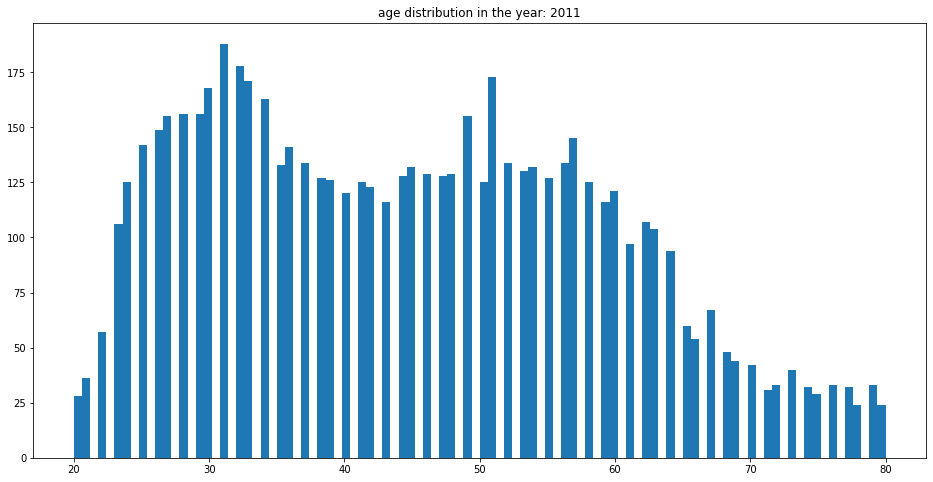

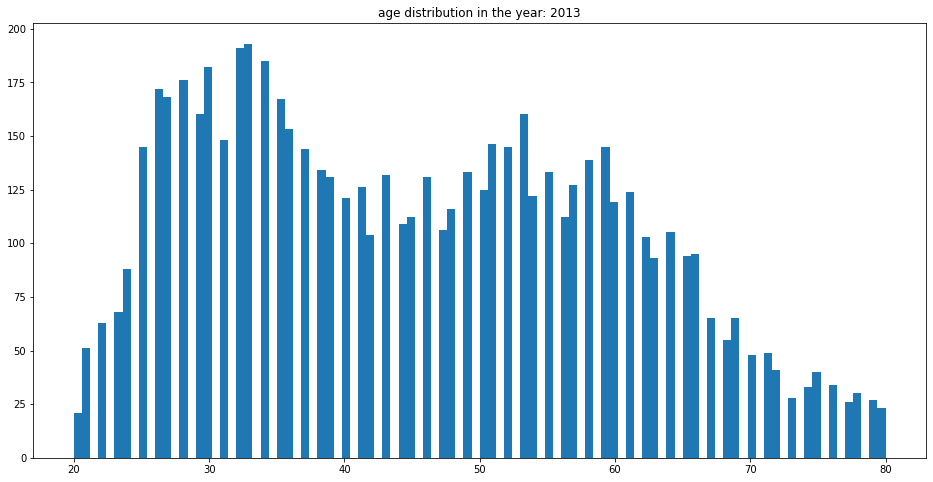

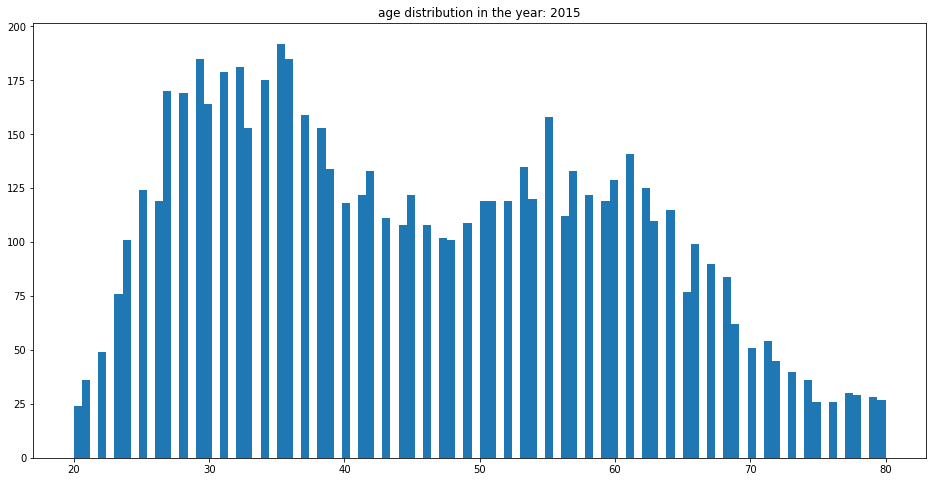

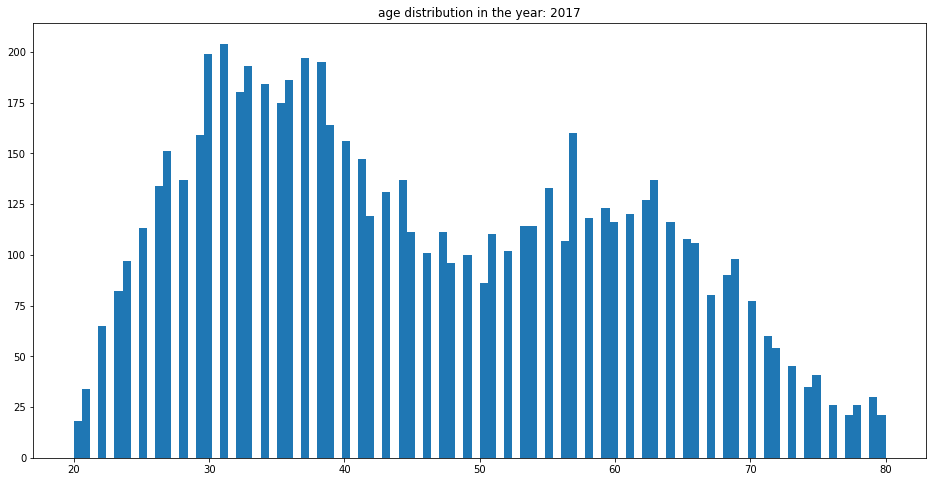

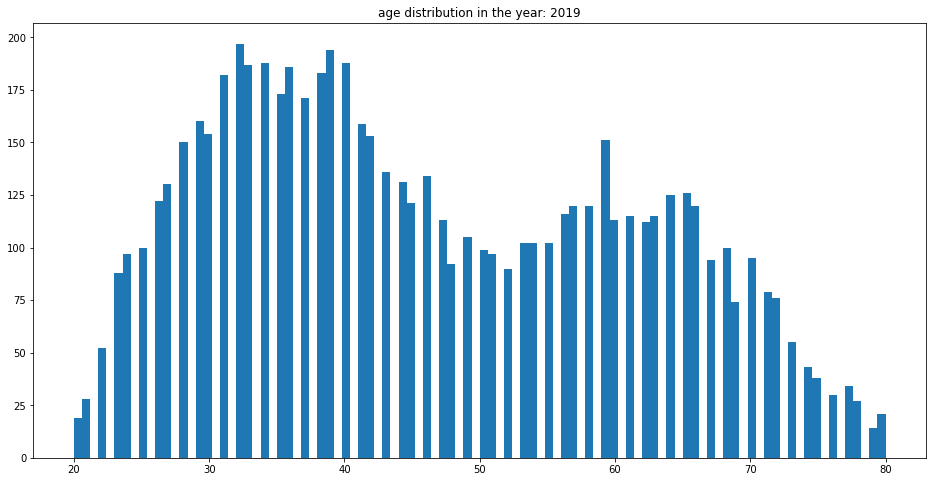

In [83]:
for year in years:
    plt.figure()
    plt.title("age distribution in the year: " + str(year))
    plt.hist(Fdf[Fdf["year"] == year].ageHead, bins = 100)

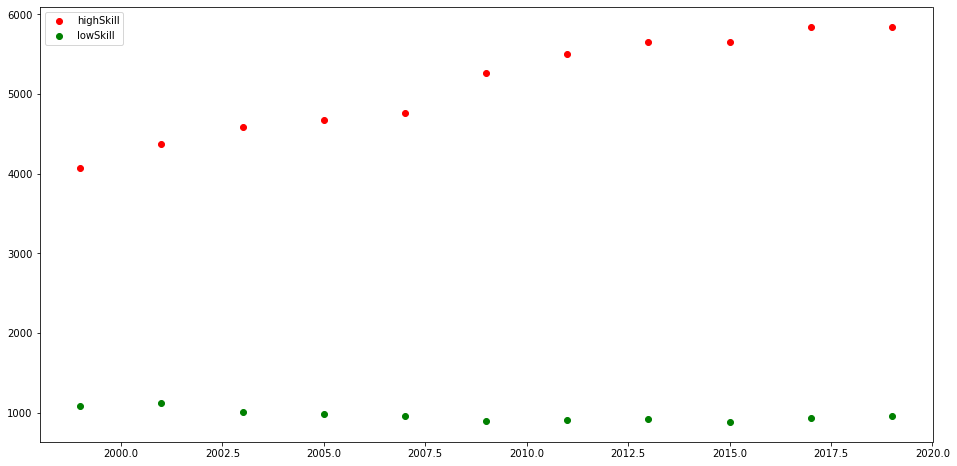

In [84]:
for year in years:
    highSkill = plt.scatter(year, Fdf[(Fdf["year"] == year)&(Fdf["skillLevel"] == "High")].shape[0], color = 'r')
    lowSkill = plt.scatter(year, Fdf[(Fdf["year"] == year)&(Fdf["skillLevel"] == "Low")].shape[0], color = 'g')
plt.legend((highSkill,lowSkill), ("highSkill", "lowSkill"))

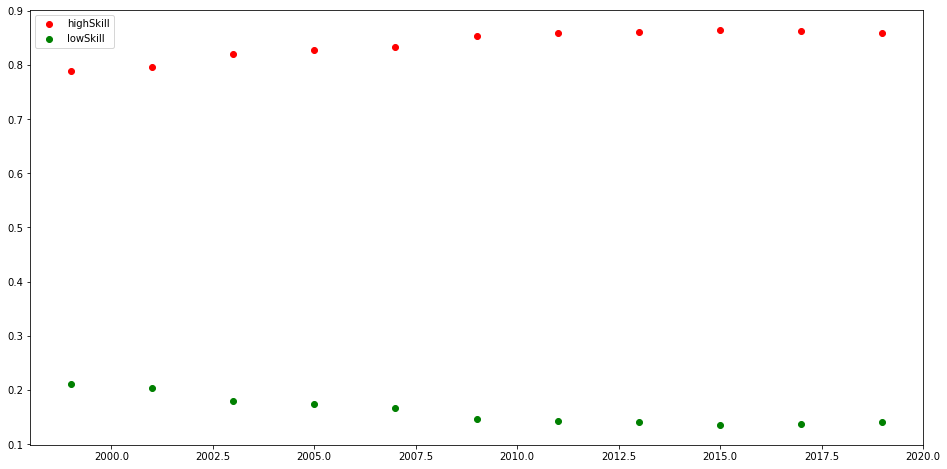

In [85]:
highSkillRatios = []
lowSkillRatios = []
for year in years:
    highRatio = Fdf[(Fdf["year"] == year)&(Fdf["skillLevel"] == "High")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    lowRatio = Fdf[(Fdf["year"] == year)&(Fdf["skillLevel"] == "Low")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    highSkillRatios.append(highRatio)
    lowSkillRatios.append(lowRatio)
    highSkill = plt.scatter(year, highRatio, color = 'r')
    lowSkill = plt.scatter(year, lowRatio, color = 'g')
plt.legend((highSkill,lowSkill), ("highSkill", "lowSkill"))

In [86]:
highSkillRatios

[0.7887897595034911,
 0.7957772115034584,
 0.8200821868858317,
 0.8267869780608634,
 0.8331003145753233,
 0.8540145985401459,
 0.8581228562519488,
 0.8598997112900775,
 0.8648731274839498,
 0.8626235797550539,
 0.8590761988820241]

In [87]:
lowSkillRatios

[0.2112102404965089,
 0.20422278849654169,
 0.1799178131141683,
 0.1732130219391366,
 0.16689968542467667,
 0.145985401459854,
 0.14187714374805113,
 0.1401002887099225,
 0.13512687251605013,
 0.13737642024494615,
 0.14092380111797587]

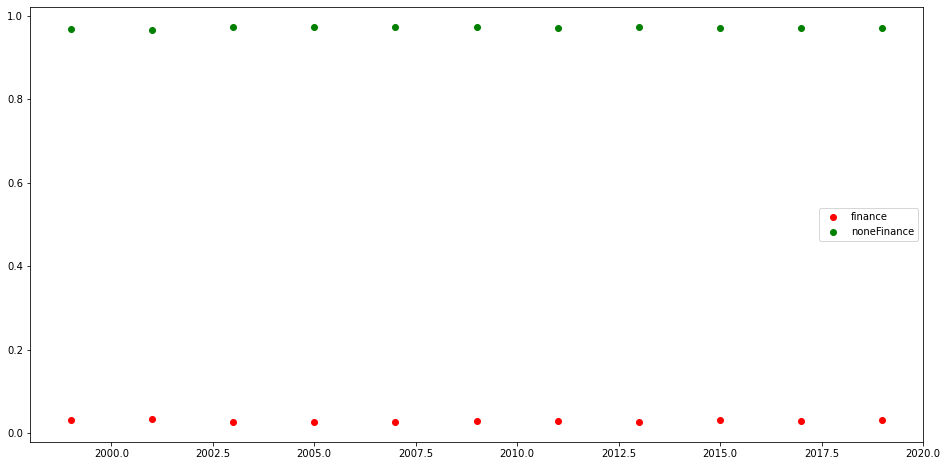

In [88]:
financeRatios = []
noneFinanceRatios= []
for year in years:
    fRatio = Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "Yes")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    nfRatio =  Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "No")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    financeRatios.append(fRatio)
    noneFinanceRatios.append(nfRatio)
    finance = plt.scatter(year, fRatio, color = 'r')
    noneFinance = plt.scatter(year, nfRatio, color = 'g')
plt.legend((finance,noneFinance), ("finance", "noneFinance"))

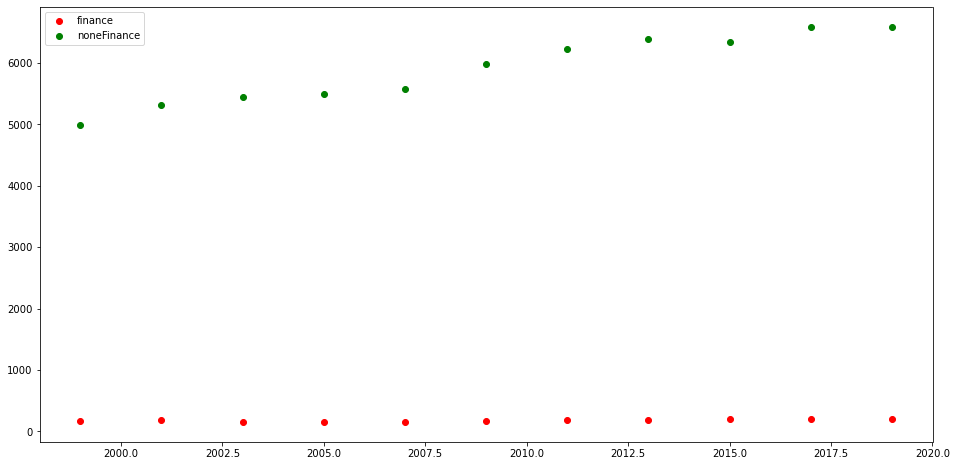

In [89]:
for year in years:
    finance = plt.scatter(year, Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "Yes")].shape[0], color = 'r')
    nonFinance = plt.scatter(year, Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "No")].shape[0], color = 'g')
plt.legend((finance,noneFinance), ("finance", "noneFinance"))

In [90]:
financeRatios

[0.03200155159038014,
 0.03330906443392792,
 0.027693407182419152,
 0.027423920736022647,
 0.026564138413142258,
 0.028223844282238442,
 0.02853133769878391,
 0.02780732411487616,
 0.030724549067563438,
 0.02862623579755054,
 0.030303030303030304]

In [91]:
noneFinanceRatios

[0.9679984484096199,
 0.9666909355660721,
 0.9723065928175808,
 0.9725760792639774,
 0.9734358615868577,
 0.9717761557177615,
 0.9714686623012161,
 0.9721926758851238,
 0.9692754509324366,
 0.9713737642024495,
 0.9696969696969697]

### empirical classes (richHigh, richLow, poorHigh, poorLow)

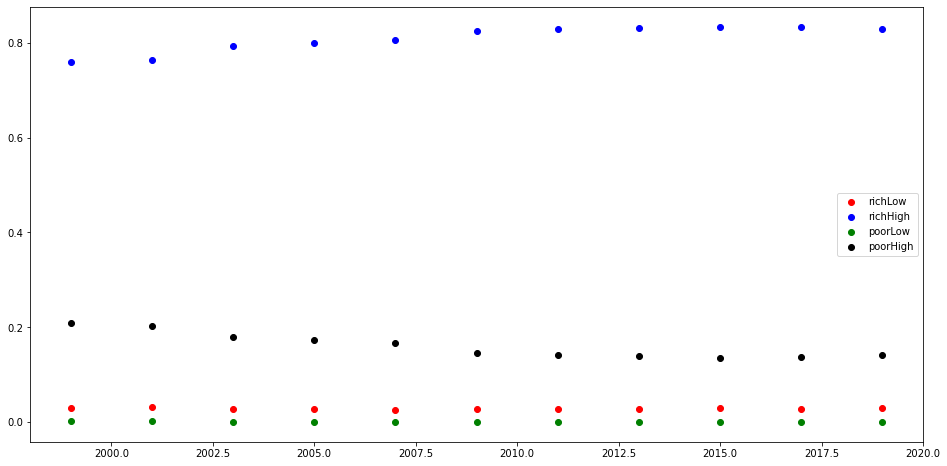

In [92]:
richHighRatios = []
richLowRatios = []
poorHighRatios = []
poorLowRatios = []
for year in years:
    richLow = Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "Yes")&(Fdf["skillLevel"] == "High")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    richHigh =  Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "No")&(Fdf["skillLevel"] == "High")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    poorLow = Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "Yes")&(Fdf["skillLevel"] == "Low")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    poorHigh =  Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "No")&(Fdf["skillLevel"] == "Low")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]   
    richHighRatios.append(richHigh)
    richLowRatios.append(richLow)
    poorHighRatios.append(poorHigh)
    poorLowRatios.append(poorLow)
    rl = plt.scatter(year, richLow, color = "r")
    rh = plt.scatter(year, richHigh, color = "b")
    pl = plt.scatter(year, poorLow, color = "g")
    ph = plt.scatter(year, poorHigh, color = "k")
plt.legend((rl,rh,pl,ph), ("richLow", "richHigh", "poorLow", "poorHigh"))